## The Process of EDA:
1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)



## Exercises
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [2]:
import acquire
import prepare
import split

df = acquire.get_iris_db()
df = prepare.prep_iris(df)
df.head(10)

,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,1,5.1,3.5,1.4,0.2,0,0
1,setosa,2,4.9,3.0,1.4,0.2,0,0
2,setosa,3,4.7,3.2,1.3,0.2,0,0
3,setosa,4,4.6,3.1,1.5,0.2,0,0
4,setosa,5,5.0,3.6,1.4,0.2,0,0
5,setosa,6,5.4,3.9,1.7,0.4,0,0
6,setosa,7,4.6,3.4,1.4,0.3,0,0
7,setosa,8,5.0,3.4,1.5,0.2,0,0
8,setosa,9,4.4,2.9,1.4,0.2,0,0
9,setosa,10,4.9,3.1,1.5,0.1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             150 non-null    object 
 1   measurement_id      150 non-null    int64  
 2   sepal_length        150 non-null    float64
 3   sepal_width         150 non-null    float64
 4   petal_length        150 non-null    float64
 5   petal_width         150 non-null    float64
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(2)
memory usage: 7.4+ KB


## 1. Univariate Stats
### Find the outliers
For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [4]:
df = df.drop(['measurement_id'], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5
species_versicolor,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0
species_virginica,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0


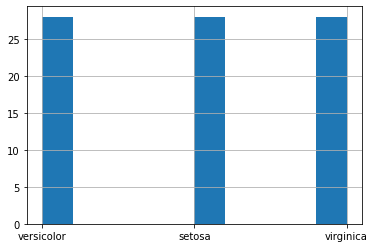

In [5]:
# For Species, the categorical variable, we want to view the distribution
# for it
train, validate, test = split.train_validate_test_split(df, 'species')
train.species.hist()
plt.show

train.describe().T

In [6]:
train.head(5)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


### Hypotheses:

1. 0: Null: there is no relationship between species and petal length/width/sepal length/width
    
    1: Alternate: species is correlated to petal length/width/sepal length/width
    

In [7]:
# We see there are an equal distribution of species.

In [8]:
#QUANT COLS
quant_col =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

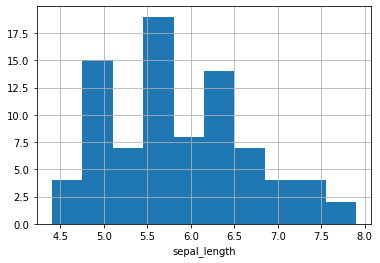

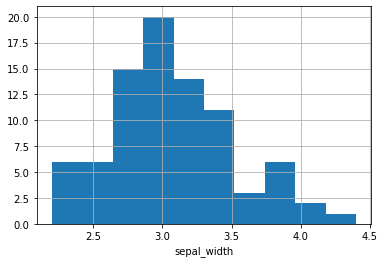

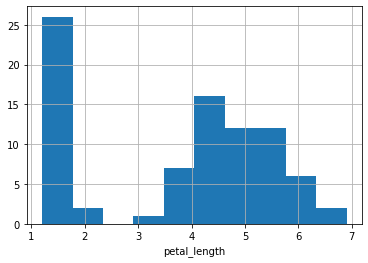

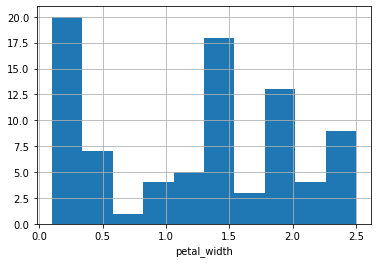

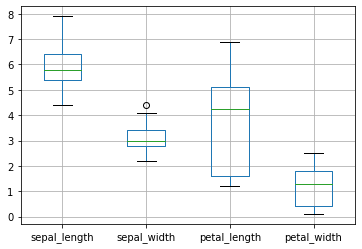

In [9]:
for col in quant_col:
    train[col].hist()
    plt.xlabel(col)
    plt.show()
    
train.boxplot(column = quant_col)
plt.show()

In [10]:
train[quant_col].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5


2. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.



In [11]:
# We are going to examine the intersection of species type, against 
# petal width and petal length, visually, for correlation.

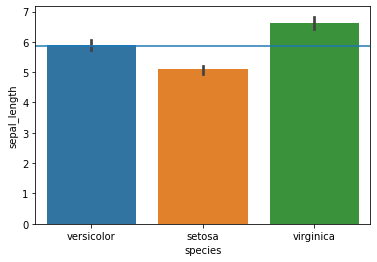

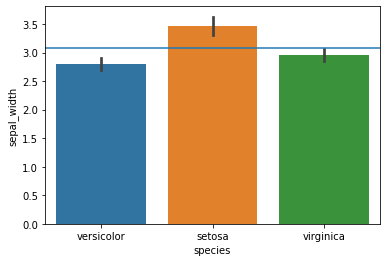

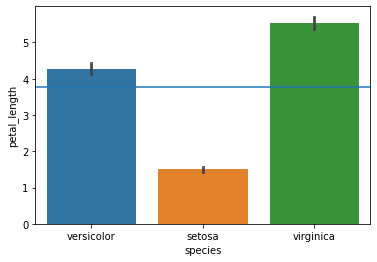

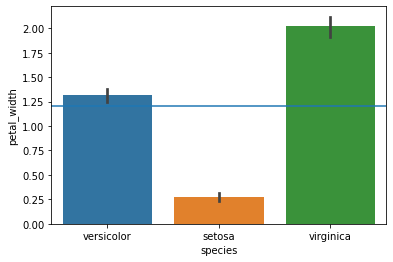

In [12]:
for col in quant_col:
    sns.barplot(x="species", y=train[col], data=train)
    avg = train[col].mean()
    plt.axhline(avg, label=f'Avg {train[col]}')
    plt.show()

In [13]:
# For each measurement type, compute the descriptive statistics
# for each species.

df.groupby(['species']).agg(['count','min', 'max', 'mean', 'std'])

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                             ... species_versicolor                    \
             mean       std  ...              count min max mean  std   
species                      ...                                        
setosa      3.428  0.379064  ...                 50   0   0  0.0  0.0   
versicolor  2.770  0.313798  ...                 50   1   1  1.0  0.0   
virginica   2.974  0.322497  ...                 50   0   0  0.0  0.0   

           species_virginica                    
                       count min max mean  std  
species                                         
setosa                    50   0   0  0.0  0.0  
versicolor                50   0   0  0.0  0.0  
virginica                 50   1   1  1.0  0.0  

[3 rows x 30 columns]

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

In [14]:
#ALT: random obs from virginica is greater than a random obs 
# from versicolor
#Null: random obs from virginica is less than or equal to a random obs 
# from versicolor


virginica = train[train.species =='virginica']
setosa = train[train.species =='setosa']
versicolor = train[train.species =='versicolor']

for col in quant_col:
    t, p = stats.mannwhitneyu(virginica[col], versicolor[col])

    print(f'Virginica/Versicolor {col}:')
    print(f't: {t}, p: {p}\n')



Virginica/Versicolor sepal_length:
t: 676.5, p: 3.082029196534108e-06

Virginica/Versicolor sepal_width:
t: 510.0, p: 0.05257259139845694

Virginica/Versicolor petal_length:
t: 776.5, p: 2.9479835715150625e-10

Virginica/Versicolor petal_width:
t: 767.0, p: 6.47119166980993e-10



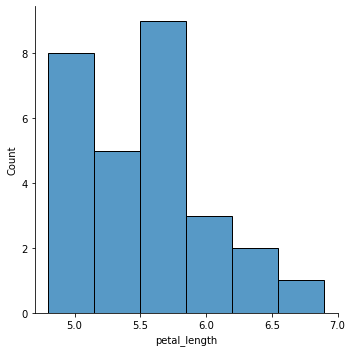

In [15]:
sns.displot(data=virginica, x=virginica.petal_length)

<AxesSubplot:>

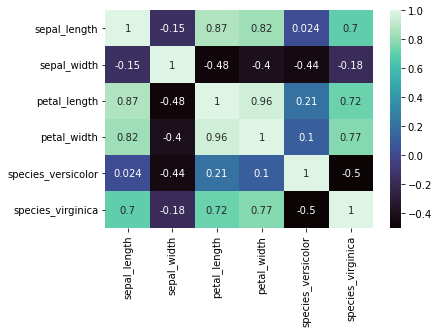

In [16]:
train.corr()
sns.heatmap(train.corr(), cmap = 'mako', annot = True)

## Takeaways:

- the Mann_Whiteney test revealed the following:
    -mean sepal length, petal length, and petal width were higher for the Virginica species, with a high degree of certainty (p < 0.05)
    -mean sepal_width is not reliably greater for Virginica (p > 0.05)


Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



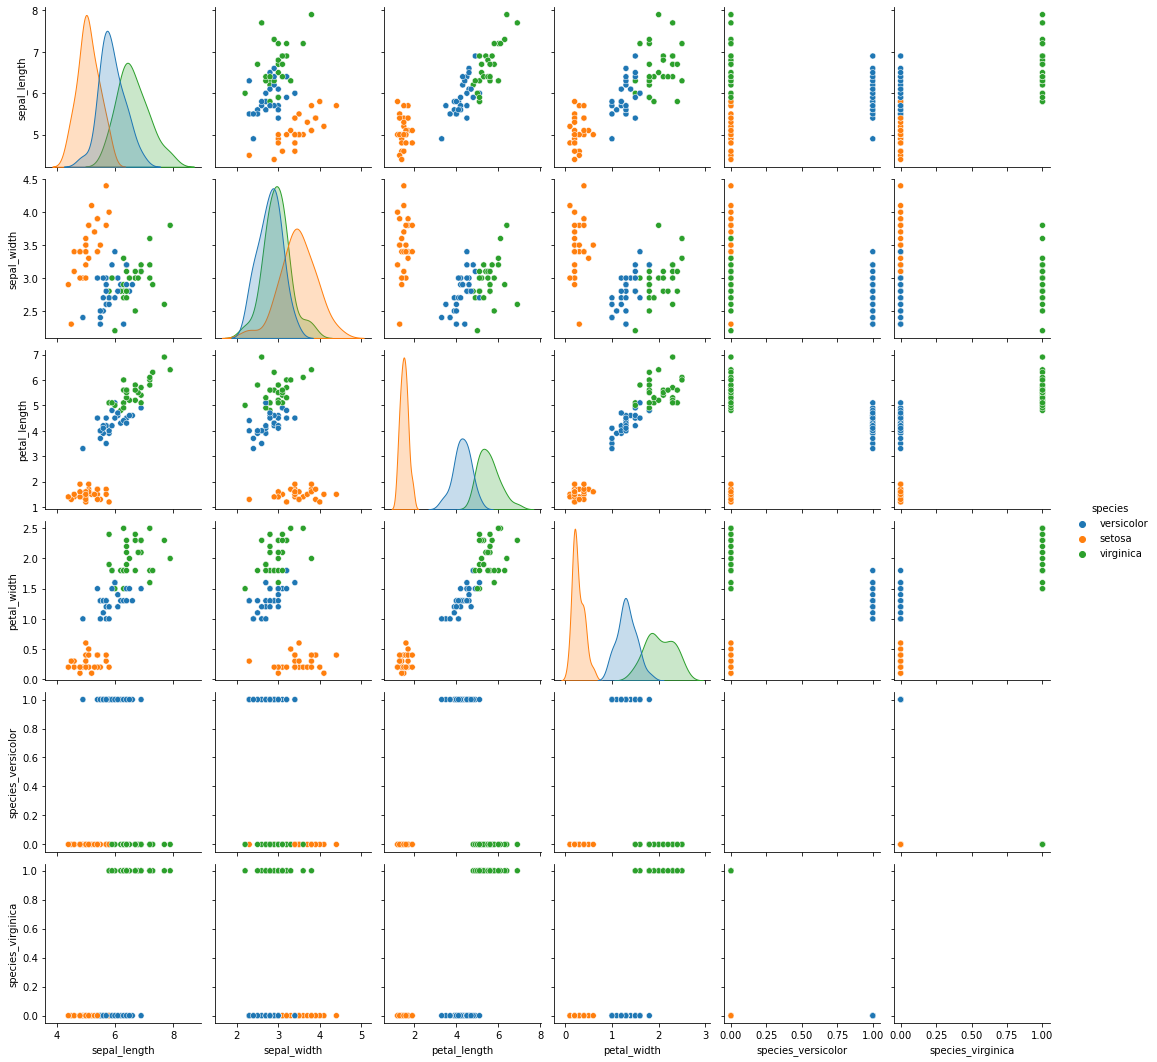

In [17]:
sns.pairplot(train, hue='species')

## Pairplot Takeaways:

- petal length, petal width, (and sepal length to a lesser extent), are good indicators of species
- petal_width(x-axis) to petal_length(y-axis) shows a clear demarcation between species. That ratio could be valuable from a predictive standpoint

## Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

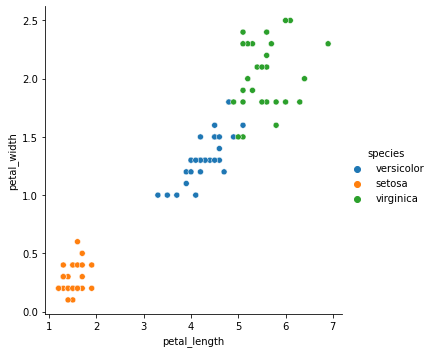

In [18]:
sns.relplot(x=train.petal_length, 
            y=train.petal_width, 
            hue=train.species)

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

## Exercises Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [19]:
# put the data through our acquire, prep and split functions
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
train, test, validate = split.train_validate_test_split(df, 'survived')

In [20]:
# determine the size of the resulting dataframe
train.shape

(498, 13)

In [21]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
583,0,1,male,36.0,0,0,40.1250,A,Cherbourg,1,0,0,1
165,1,3,male,9.0,0,2,20.5250,NaN,Southampton,0,0,1,1
50,0,3,male,7.0,4,1,39.6875,NaN,Southampton,0,0,1,1
259,1,2,female,50.0,0,1,26.0000,NaN,Southampton,0,0,1,0
306,1,1,female,NaN,0,0,110.8833,NaN,Cherbourg,1,0,0,0


In [22]:
#determine the amount of null data
train.isna().sum()

survived                     0
pclass                       0
sex                          0
age                         97
sibsp                        0
parch                        0
fare                         0
deck                       392
embark_town                  1
alone                        0
embark_town_Queenstown       0
embark_town_Southampton      0
sex_male                     0
dtype: int64

In [23]:
# ...and then as a percentage
train.isna().mean()

survived                   0.000000
pclass                     0.000000
sex                        0.000000
age                        0.194779
sibsp                      0.000000
parch                      0.000000
fare                       0.000000
deck                       0.787149
embark_town                0.002008
alone                      0.000000
embark_town_Queenstown     0.000000
embark_town_Southampton    0.000000
sex_male                   0.000000
dtype: float64

In [24]:
## Takeaway: deck is 79% null, so I'm going to drop this column.
train = train.drop(columns=['deck'])

In [25]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,0,0,1
165,1,3,male,9.0,0,2,20.5250,Southampton,0,0,1,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0,0,1,1
259,1,2,female,50.0,0,1,26.0000,Southampton,0,0,1,0
306,1,1,female,NaN,0,0,110.8833,Cherbourg,1,0,0,0


In [26]:
# Now formulate questions to explore:
# Are the following related to our target variable, 'survived':
# alone, sex, pclass
#...now make some charts to visualize the interaction 
# with our target variable

<AxesSubplot:>

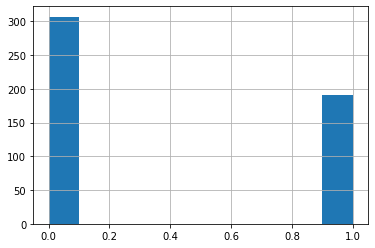

In [27]:
train.survived.hist()

## Exercises Part III
Explore your telco data to discover drivers of churn

Determine if certain columns should be dropped

Determine if it would be valuable to bin some numeric columns

Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [28]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
df.shape

(7032, 28)

In [29]:
df.isna().sum()

customer_id                                0
gender                                     0
senior_citizen                             0
partner                                    0
dependents                                 0
tenure                                     0
phone_service                              0
multiple_lines                             0
online_security                            0
online_backup                              0
device_protection                          0
tech_support                            1520
streaming_tv                            1520
streaming_movies                        1520
paperless_billing                          0
monthly_charges                            0
total_charges                              0
churn                                      0
contract_type                              0
payment_type                               0
internet_service_type                      0
contract_type_One year                     0
contract_t

In [30]:
#observed 1,520 nulls in the columns for tech_support, streaming_tv, and 
# streaming_movies. Decided to fill the colmuns with 0 (no plan) to smooth
# the data. Plus those columns are not essential to our analysis.
# Note: turns out this was a data transformation error. All nulls
# were originally 'No'
df[df.tech_support.isna()]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,payment_type,internet_service_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
20,0023-UYUPN,1,1,1,0,50,Yes,Yes,No internet service,No internet service,...,One year,Electronic check,None,1,0,0,1,0,0,1
23,0030-FNXPP,1,0,0,0,3,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1
24,0031-PVLZI,1,0,1,1,4,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1
27,0040-HALCW,0,0,1,1,54,Yes,No,No internet service,No internet service,...,Two year,Credit card (automatic),None,0,1,1,0,0,0,1
28,0042-JVWOJ,0,0,0,0,26,Yes,No,No internet service,No internet service,...,One year,Bank transfer (automatic),None,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,1,0,0,0,6,Yes,No,No internet service,No internet service,...,Month-to-month,Credit card (automatic),None,0,0,1,0,0,0,1
7028,9972-EWRJS,1,0,1,1,67,Yes,No,No internet service,No internet service,...,Two year,Bank transfer (automatic),None,0,1,0,0,0,0,1
7032,9975-GPKZU,0,0,1,1,46,Yes,No,No internet service,No internet service,...,Two year,Credit card (automatic),None,0,1,1,0,0,0,1
7033,9975-SKRNR,0,0,0,0,1,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1


In [31]:
df = df.fillna(0)
df.isna().sum()

customer_id                             0
gender                                  0
senior_citizen                          0
partner                                 0
dependents                              0
tenure                                  0
phone_service                           0
multiple_lines                          0
online_security                         0
online_backup                           0
device_protection                       0
tech_support                            0
streaming_tv                            0
streaming_movies                        0
paperless_billing                       0
monthly_charges                         0
total_charges                           0
churn                                   0
contract_type                           0
payment_type                            0
internet_service_type                   0
contract_type_One year                  0
contract_type_Two year                  0
payment_type_Credit card (automati

In [32]:
#split:
train, validate, test = split.train_validate_test_split(df, 'churn')
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,payment_type,internet_service_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,8331-ZXFOE,1,0,0,0,58,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),DSL,1,0,1,0,0,0,0
1915,2790-XUYMV,0,0,0,1,71,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),Fiber optic,1,0,1,0,0,1,0
5054,7107-UBYKY,1,0,1,1,35,Yes,Yes,No internet service,No internet service,...,Month-to-month,Electronic check,None,0,0,0,1,0,0,1
2355,3373-YZZYM,0,0,1,1,1,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1
6279,8883-GRDWQ,0,1,0,0,20,Yes,No,Yes,No,...,One year,Mailed check,DSL,1,0,0,0,1,0,0


In [33]:
train.churn.value_counts(), validate.churn.value_counts(), test.churn.value_counts()

(0    2891
 1    1046
 Name: churn, dtype: int64,
 0    1239
 1     449
 Name: churn, dtype: int64,
 0    1033
 1     374
 Name: churn, dtype: int64)

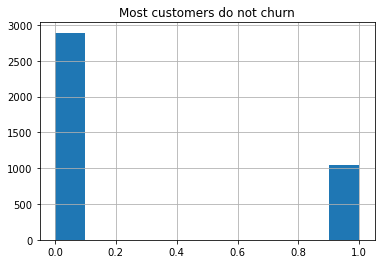

In [34]:
# Let's explore the data!
plt.title("Most customers do not churn")
train.churn.hist()
plt.show()

In [35]:
train.columns.value_counts()

customer_id                             1
gender                                  1
internet_service_type_Fiber optic       1
payment_type_Mailed check               1
payment_type_Electronic check           1
payment_type_Credit card (automatic)    1
contract_type_Two year                  1
contract_type_One year                  1
internet_service_type                   1
payment_type                            1
contract_type                           1
churn                                   1
total_charges                           1
monthly_charges                         1
paperless_billing                       1
streaming_movies                        1
streaming_tv                            1
tech_support                            1
device_protection                       1
online_backup                           1
online_security                         1
multiple_lines                          1
phone_service                           1
tenure                            

In [36]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,payment_type,internet_service_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,8331-ZXFOE,1,0,0,0,58,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),DSL,1,0,1,0,0,0,0
1915,2790-XUYMV,0,0,0,1,71,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),Fiber optic,1,0,1,0,0,1,0
5054,7107-UBYKY,1,0,1,1,35,Yes,Yes,No internet service,No internet service,...,Month-to-month,Electronic check,None,0,0,0,1,0,0,1
2355,3373-YZZYM,0,0,1,1,1,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1
6279,8883-GRDWQ,0,1,0,0,20,Yes,No,Yes,No,...,One year,Mailed check,DSL,1,0,0,0,1,0,0


In [37]:
train = train.rename(columns={'gender':'is_female'})
train.head()

,customer_id,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,payment_type,internet_service_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,8331-ZXFOE,1,0,0,0,58,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),DSL,1,0,1,0,0,0,0
1915,2790-XUYMV,0,0,0,1,71,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),Fiber optic,1,0,1,0,0,1,0
5054,7107-UBYKY,1,0,1,1,35,Yes,Yes,No internet service,No internet service,...,Month-to-month,Electronic check,None,0,0,0,1,0,0,1
2355,3373-YZZYM,0,0,1,1,1,Yes,No,No internet service,No internet service,...,Month-to-month,Mailed check,None,0,0,0,0,1,0,1
6279,8883-GRDWQ,0,1,0,0,20,Yes,No,Yes,No,...,One year,Mailed check,DSL,1,0,0,0,1,0,0


In [38]:
#create subsets
churned = train[train.churn == 'Yes']
stayed = train[train.churn == 'No']

Text(0.5, 1.0, 'Senior Citizens are a Modestly sized Subset')

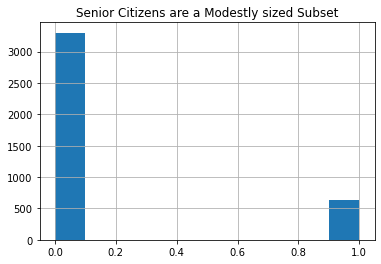

In [39]:
# view distributions:
train.senior_citizen.hist()
plt.title("Senior Citizens are a Modestly sized Subset")

Text(0.5, 1.0, 'Customers are evenly split by Gender')

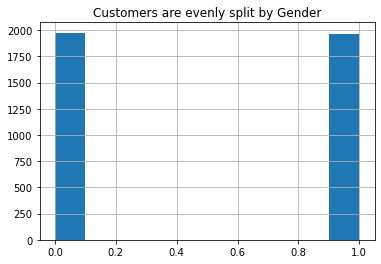

In [40]:
train.is_female.hist()
plt.title("Customers are evenly split by Gender")

Text(0.5, 1.0, 'Most customers do not have dependents')

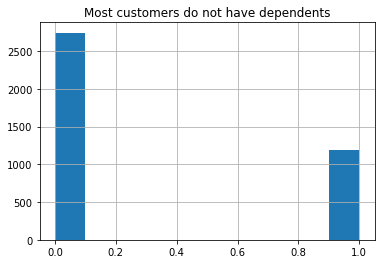

In [41]:
train.dependents.hist()
plt.title("Most customers do not have dependents")

Text(0.5, 1.0, 'How many customers have Phone service?')

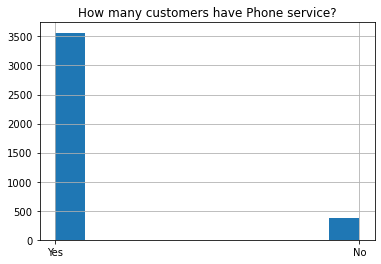

In [42]:
train.phone_service.hist()
plt.title("How many customers have Phone service?")

Text(0.5, 1.0, 'How many customers have multiple lines?')

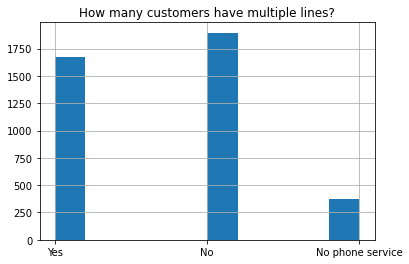

In [43]:
train.multiple_lines.hist()
plt.title("How many customers have multiple lines?")

Text(0.5, 1.0, 'How long do customers stay?')

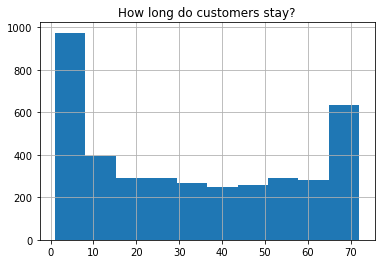

In [44]:
train.tenure.hist()
plt.title("How long do customers stay?")

Text(0.5, 1.0, 'Who has internet and what kind of plan?')

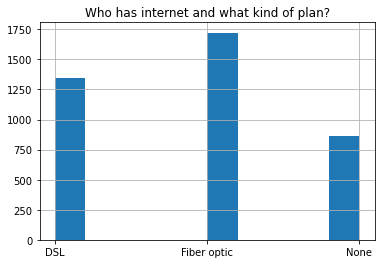

In [45]:
train.internet_service_type.hist()
plt.title("Who has internet and what kind of plan?")

Text(0.5, 1.0, 'How do customers pay?')

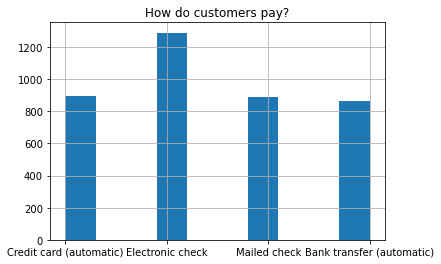

In [46]:
train.payment_type.hist()
plt.title("How do customers pay?")

## Takeaways from Univariate modeling:
- Population dynamics:
    - the elderly are a small proportion of the total population
    - most customers do not have dependents
    - the customer base is evenly split between genders
- Products consumed: 
    - most customers have a phone plan
    - most customers have either DSL or fiber internet, about 1/4 have none
- Payments:
    - the most common method of payment is e-check
- Tenure: 
    - the most ommon tenures are 0 months, and 70 months. The other tenures have similar distributions

## Bivariate Stats
- scatterplots to visualize the numeric columns
- catplot/barplot/boxplot for categorical variables with numeric variables
- some realtionships I want to see:
    - churn vs payment type
    - payment type vs tenure
    - payment type vs phone, internet plan


In [47]:
train.head(2)

,customer_id,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,payment_type,internet_service_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,8331-ZXFOE,1,0,0,0,58,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),DSL,1,0,1,0,0,0,0
1915,2790-XUYMV,0,0,0,1,71,Yes,Yes,Yes,Yes,...,One year,Credit card (automatic),Fiber optic,1,0,1,0,0,1,0


In [48]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

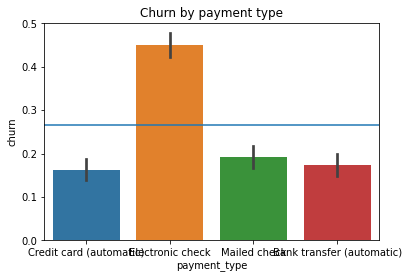

In [49]:
plt.title("Churn by payment type")
sns.barplot(x="payment_type", y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

<Figure size 1800x1080 with 0 Axes>

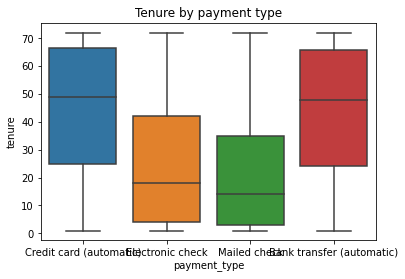

<Figure size 1800x1080 with 0 Axes>

In [67]:
plt.title("Tenure by payment type")
sns.boxplot(x=train.payment_type, y=train.tenure, data=train)
plt.figure(figsize=(25,15))

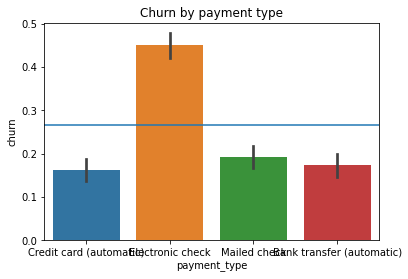

In [64]:
plt.title("Churn by payment type")
sns.barplot(x="payment_type", y="churn", data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="population avg churn")

In [74]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
null_hypothesis = "churn and payment type are independent"
alternative_hypothesis = "there is a relationship between churn and payment type"

# Setup a crosstab of observed churn to payment type
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"P is equal to: {p}")

Reject the null hypothesis that churn and payment type are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment type
P is equal to: 4.64358817076333e-73


<AxesSubplot:title={'center':'Tenure by payment type'}, xlabel='total_charges', ylabel='tenure'>

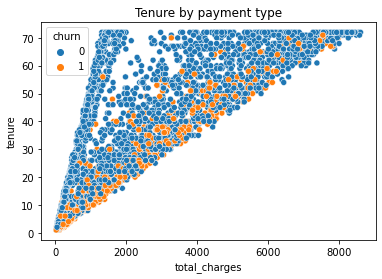

In [56]:
plt.title("Tenure by payment type")
sns.scatterplot(x=train.total_charges, y=train.tenure, data=train, hue=train.churn)